In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# データ読み込み
df = pd.read_csv("../data/statistics_training_sample.csv")

In [5]:
# --- 記述統計 ---
print("平均年齢:", df['age'].mean())
print("年齢の標準偏差:", df['age'].std())

平均年齢: 43.82
年齢の標準偏差: 15.051869502164974


In [6]:
# --- t検定（生存者と非生存者の年齢差） ---
age_survived = df[df['survived'] == 1]['age']
age_not_survived = df[df['survived'] == 0]['age']
t_stat, p_value = stats.ttest_ind(age_survived, age_not_survived, equal_var=False)
print("t検定統計量:", t_stat)
print("p値:", p_value)

t検定統計量: 1.3938760799017769
p値: 0.1722430289867447


In [ ]:
# --- カイ二乗検定（生存と運賃カテゴリの関係） ---
df['fare_category'] = pd.qcut(df['fare'], 3, labels=['low', 'medium', 'high'])
contingency_table = pd.crosstab(df['fare_category'], df['survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("カイ二乗値:", chi2)
print("p値:", p)

カイ二乗値: 3.1234395286128036
p値: 0.2097749972560596


In [8]:
# --- 可視化 ---
sns.set(style="whitegrid")

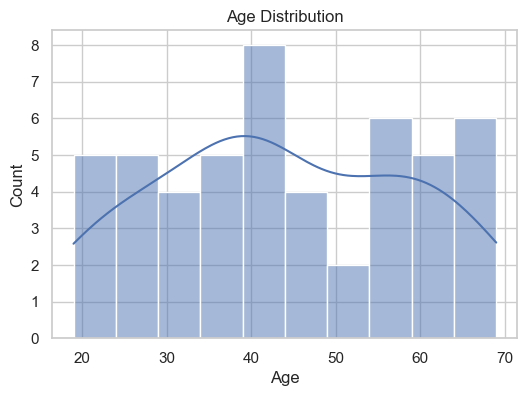

In [9]:
# 年齢分布のヒストグラム
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

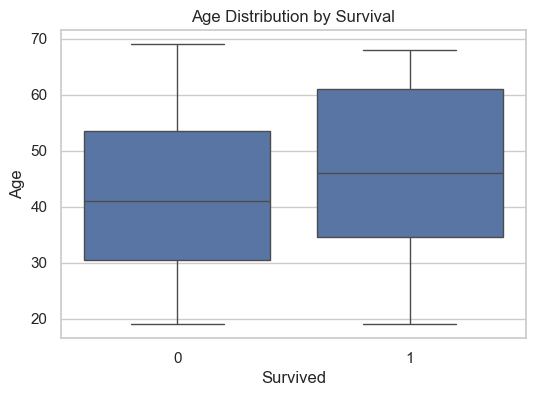

In [10]:
# 生存別の年齢分布
plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

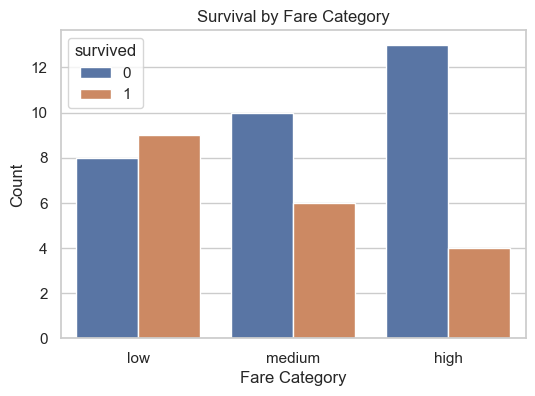

In [11]:
# 運賃カテゴリと生存率の関係
plt.figure(figsize=(6, 4))
sns.countplot(x='fare_category', hue='survived', data=df)
plt.title("Survival by Fare Category")
plt.xlabel("Fare Category")
plt.ylabel("Count")
plt.show()